In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.csv')

In [2]:
cacao

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1791,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [15]:
display(cacao.head(10))
cacao.info()

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bar_id            1795 non-null   int64  
 1   company           1795 non-null   object 
 2   specific_origin   1737 non-null   object 
 3   ref               1795 non-null   int64  
 4   review_date       1795 non-null   int64  
 5   cocoa_percent     1795 non-null   object 
 6   company_location  1795 non-null   object 
 7   rating            1795 non-null   float64
 8   bean_type         1794 non-null   object 
 9   broad_origin      1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [5]:
cacao.columns = ['bar_id', 'company', 'specific_origin', 'ref', 'review_date', 'cocoa_percent', 
                 'company_location', 'rating', 'bean_type', 'broad_origin']

In [5]:
cacao

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1791,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


1795


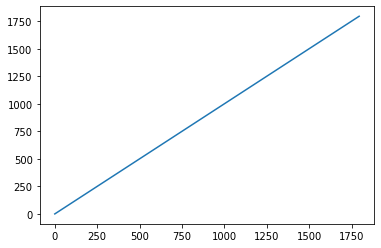

In [6]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

In [7]:
cacao.drop(['bar_id'], inplace = True, axis = 1)

In [6]:
pd.DataFrame(cacao.company.value_counts()).head(10)

,company
,99
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
A. Morin,21
Valrhona,21
Arete,20
Guittard,18


In [8]:
cacao.company.value_counts().head(10)

            99
Soma        45
Fresco      26
Bonnat      26
Pralus      25
Domori      22
A. Morin    21
Valrhona    21
Arete       20
Guittard    18
Name: company, dtype: int64

In [7]:
cacao.company.nunique()
len(cacao.company.value_counts())

408

In [11]:
cacao

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [9]:
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())

Значений, встретившихся в столбце более 10 раз: 31


In [10]:
cacao.loc[:, ['company']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1795 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


In [11]:
(cacao.company.value_counts() > 10).sum()

31

In [15]:
cacao

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [12]:
cacao.specific_origin.value_counts()

                                              58
Madagascar                                    55
Peru                                          44
Ecuador                                       39
Dominican Republic                            33
                                              ..
Agua Fria; Sucre region                        1
Quilla                                         1
Sambirano Valley, Black Science, B-60307.0     1
Toledo District                                1
Los Rios, Quevedo                              1
Name: specific_origin, Length: 1013, dtype: int64

In [13]:
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)

In [14]:
cacao.specific_origin.value_counts()

Madagascar                              55
Peru                                    44
Ecuador                                 39
Dominican Republic                      33
Venezuela                               21
                                        ..
Matiguas                                 1
Manickchand Estate                       1
Alto Beni, Wild Harvest, Limited Ed.     1
Vale do Juliana, w/ nibs                 1
Los Rios, Vinces                         1
Name: specific_origin, Length: 1012, dtype: int64

In [18]:
(cacao.specific_origin.value_counts() > 10).sum()

15

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

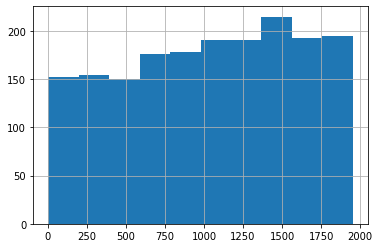

In [19]:
cacao.ref.hist()
cacao.ref.describe()

In [20]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


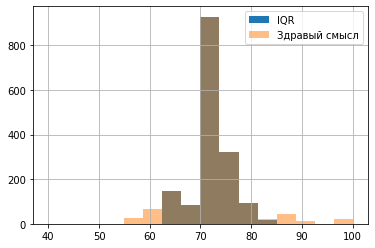

In [21]:
median = cacao.cocoa_percent.median()
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend();

In [22]:
cacao.company_location

0        France
1        France
2        France
3        France
4        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1795, dtype: object

In [23]:
cacao.company_location.unique()

array(['France', 'U.S.A.', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy', 'Brazil',
       'U.K.', 'Australia', 'Wales', 'Belgium', 'Germany', 'Russia',
       'Puerto Rico', 'Venezuela', 'Colombia', 'Japan', 'New Zealand',
       'Costa Rica', 'South Korea', 'Amsterdam', 'Scotland', 'Martinique',
       'Sao Tome', 'Argentina', 'Guatemala', 'South Africa', 'Bolivia',
       'St. Lucia', 'Portugal', 'Singapore', 'Denmark', 'Vietnam',
       'Grenada', 'Israel', 'India', 'Czech Republic',
       'Domincan Republic', 'Finland', 'Madagascar', 'Philippines',
       'Sweden', 'Poland', 'Austria', 'Honduras', 'Nicaragua',
       'Lithuania', 'Niacragua', 'Chile', 'Ghana', 'Iceland', 'Eucador',
       'Hungary', 'Suriname', 'Ireland'], dtype=object)

In [24]:
(cacao.company_location.value_counts() > 10).sum()

22

In [25]:
cacao.loc[:, ['company_location']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1795 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


In [26]:
type(cacao.loc[:,['rating']])

pandas.core.frame.DataFrame

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


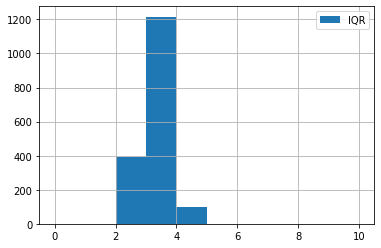

In [27]:
median = cacao.rating.median()
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
out1 = perc25 - 1.5*IQR
out2 = perc75 + 1.5*IQR
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=out1, l=out2))
cacao.rating.loc[cacao.rating.between(out1, out2)].hist(bins = 10, range = (0, 10), label = 'IQR')
plt.legend();

In [28]:
cacao = cacao.loc[cacao.rating.between(out1, out2)]

In [29]:
cacao.rating.between(out1, out2)

1       True
2       True
3       True
4       True
5       True
        ... 
1790    True
1791    True
1792    True
1793    True
1794    True
Name: rating, Length: 1708, dtype: bool

In [30]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                                        else x if '(' not in x else x[:x.find('(')].strip())

/Users/mihails.volkovs/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
cacao.broad_origin.nunique()

97

In [32]:
cacao.broad_origin.value_counts()

Venezuela                       204
Ecuador                         180
Peru                            159
Madagascar                      142
Dominican Republic              135
                               ... 
Gabon                             1
Guat., D.R., Peru, Mad., PNG      1
Dom. Rep., Madagascar             1
Ven, Trinidad, Ecuador            1
Tobago                            1
Name: broad_origin, Length: 97, dtype: int64

In [33]:
cacao.broad_origin = cacao.broad_origin.apply(lambda x: None if str(x).strip() == '' else x)

In [34]:
(cacao.broad_origin.value_counts() > 10).sum()

25

In [35]:
cacao.broad_origin.unique()

array(['Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama', 'Madagascar',
       'Brazil', 'Ecuador', 'Colombia', 'Burma', 'Papua New Guinea',
       'Bolivia', 'Fiji', 'Mexico', 'Indonesia', 'Trinidad', 'Vietnam',
       'Nicaragua', 'Tanzania', 'Dominican Republic', 'Ghana', 'Belize',
       None, 'Jamaica', 'Honduras', 'Costa Rica', 'Guatemala', 'Haiti',
       'Congo', 'Philippines', 'Domincan Republic', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Grenada',
       'Sao Tome', 'Uganda', 'Martinique', 'Sao Tome & Principe',
       'Vanuatu', 'Australia', 'Liberia', 'Ecuador, Costa Rica',
       'West Africa', 'Hawaii', 'St. Lucia', 'Cost Rica, Ven',
       'Peru, Madagascar', 'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Trinidad-Tobago',
       'Peru, Ecuador, Venezuela', 'Venezuela, Dom

In [36]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [37]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries).sort_values()

In [38]:
cacao.broad_origin

1            Togo
2            Togo
3            Togo
4            Peru
5       Venezuela
          ...    
1790         Peru
1791        Congo
1792        India
1793        India
1794       Brazil
Name: broad_origin, Length: 1708, dtype: object

In [39]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))

,broad_origin
Venezuela,204
Ecuador,180
Peru,160
Madagascar,142
DominicanRepublic,135
...,...
"Venezuela,Trinidad,Ecuador",1
"DomincanRepublic,Madagascar",1
"Venezuela,Carribean",1
"Madagascar,Java,PapuaNewGuinea",1


In [40]:
cacao.broad_origin.nunique()

94

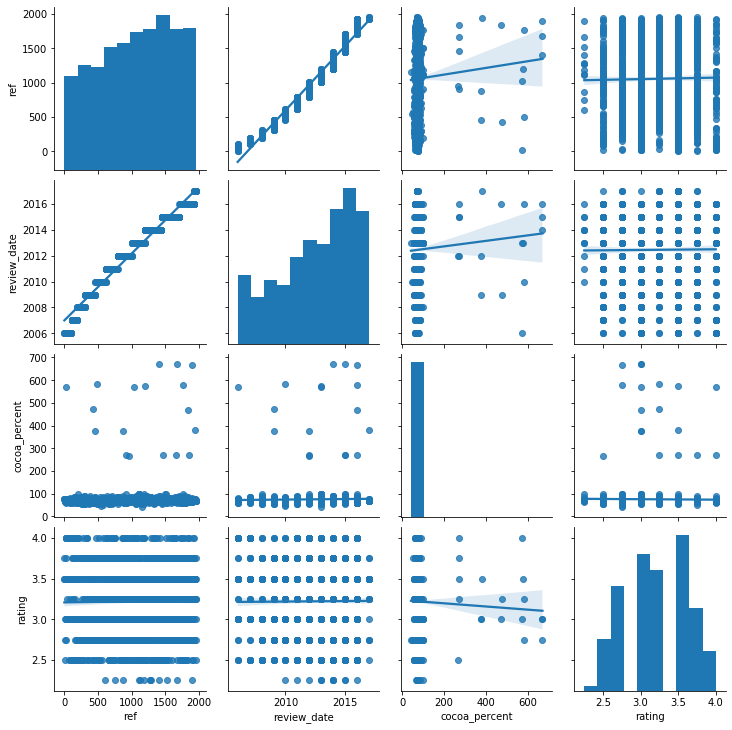

In [41]:
sns.pairplot(cacao, kind = 'reg')

In [42]:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984927,0.038464,0.016306
review_date,0.984927,1.000000,0.031937,0.007524
cocoa_percent,0.038464,0.031937,1.000000,-0.020138
rating,0.016306,0.007524,-0.020138,1.000000


In [43]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

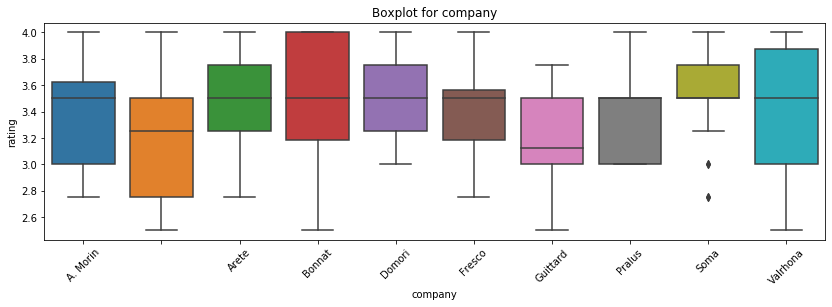

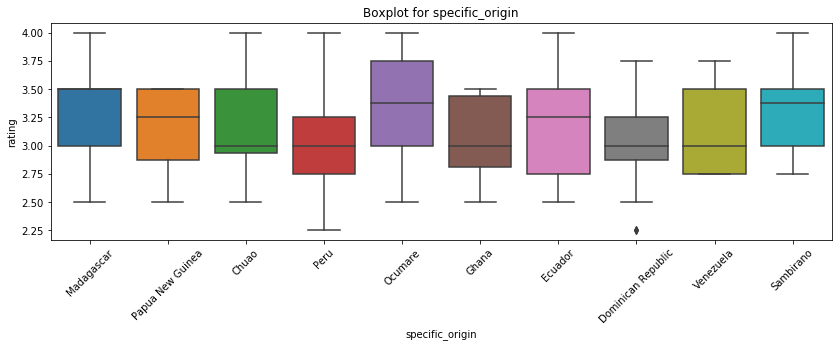

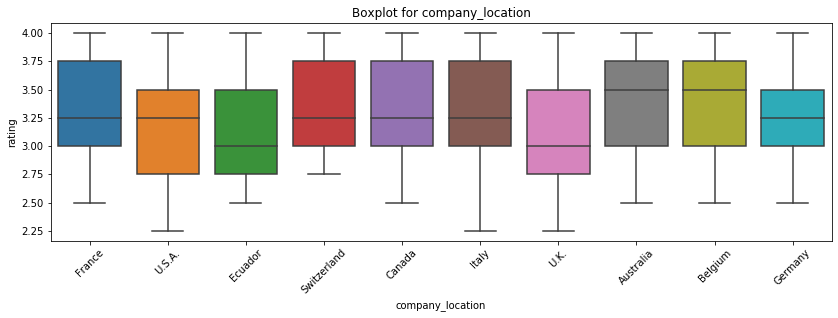

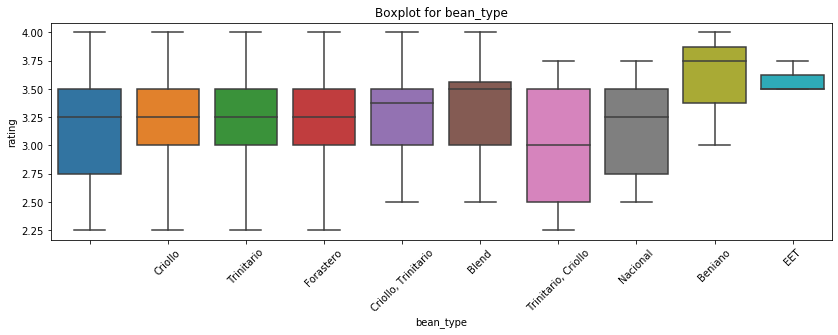

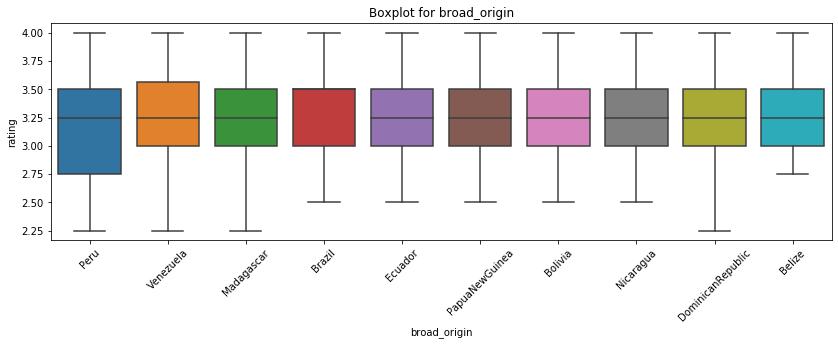

In [44]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

In [45]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [46]:
cols = cacao.loc[:, 'broad_origin'].value_counts().index[:10]
cols

Index(['Venezuela', 'Ecuador', 'Peru', 'Madagascar', 'DominicanRepublic',
       'Nicaragua', 'Brazil', 'Bolivia', 'Belize', 'PapuaNewGuinea'],
      dtype='object')

In [47]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


In [48]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()

,company,specific_origin,company_location,review_date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
2,A. Morin,Atsane,France,2015,670.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
